# **Data Preparation**

So, we have our .csv files of the songs, one time with 1000, the other time with 5000 songs and what we maybe come up with later to have fun.
Our learning platform also provides us with further information about the columns:

**acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. - *Float*  
**danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.	- *Float*  
**duration_ms** - The duration of the track in milliseconds. - *Integer*  
**energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. - *Float*  
**instrumentalness** - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. - *Float*  
**key** - The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. - *Integer*  
**liveness** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. - *Float*  
**loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db. - *Float*  
**mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. - *Integer*  
**speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. - *Float*  
**tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. - *Float*  
**time_signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). - *Integer*  
**valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).	*Float*  

We now have to choose which columns are worth to keep based on these informations and our own thoughts about it and store them in a new dataframe we even might want to turn into a .csv.

## **1. Importing the needed modules and .csv files**

In [33]:
# We want pandas and our scaler:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

# We keep .csv files in same path as our project so we easy navigate to them:
df_1000 = pd.read_csv(r'df_audio_features_1000.csv')
df_5000 = pd.read_csv(r'df_audio_features_5000.csv',skipinitialspace=True)


## **2. Inspecting the DataFrame to Clean it** 

In [34]:
#Basic pandas stuff:
# df_1000.info() # Put/Remove comment to read/see
# df_1000.sample(5) # Put/Remove comment to read/see
# df_5000.sample(5) # Put/Remove comment to read/see


### Conclusion here:
* we want to combine artist and name into one column (might be covers on some datasets) 
* drop the other 2 columns with Dtype = object ('id','html'), we need only numbers...
* drop 'key', 'mode', 'type', 'duration_ms', 'time_signature', since they seem meaningless for us.

## **3. Preparing the data:**
### **3.1 1000 songs df:**

In [35]:
# New column 'title' to get rid of 2 objects:
df_1000['title'] = df_1000['name'] + ' - ' + df_1000['artist']
# Drop a bunch of stuff:
# df_1000.drop(['artist','name','id','html','key','mode','type','duration_ms','time_signature']) # cant find the freaking typo - can aswell create a sorted:
clustersongs_1000 = df_1000[['title','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','time_signature','valence','tempo']]
# clustersongs_1000.sample(1) # See how it worked
clustersongs_1000.set_index('title', inplace=True)

### **3.2 5000 songs df**:

In [36]:
df_5000.columns = df_5000.columns.str.strip()
df_5000['title'] = df_5000['name'] + ' - ' + df_5000['artist']
clustersongs_5000 = df_5000[['title','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','time_signature','valence','tempo']]
clustersongs_5000.set_index('title', inplace=True)

## **4. Different Scaler:**

In [37]:
 pip install scikit-learn  --upgrade

Note: you may need to restart the kernel to use updated packages.


# 4.1 Min and Max Scaling for 1000 songs

In [38]:
# Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# Create DataFrame of MinMax scaled values
my_scaler = MinMaxScaler().set_output(transform='pandas')
min_max_df = my_scaler.fit_transform(clustersongs_1000)

# Display age column of original DataFrame and age column of MinMaxed DataFrame to compare
pd.DataFrame({
    'original': clustersongs_1000.iloc[:,1], 
    'min_max_scale': min_max_df.iloc[:,1]
}).sort_values(by='original')

original  min_max_scale
title                                                                      
Track3a (2waynice) - Keith Fullerton Whitman        0.000020       0.000000
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ...  0.000930       0.000913
Photo With Grey Sky, White Clouds - Jonny Nash      0.000985       0.000969
The Unanswered Question - Charles Ives              0.001080       0.001064
The Unquestioned Answer - Laurie Spiegel            0.001340       0.001325
...                                                      ...            ...
Raining Blood - Slayer                              0.995000       0.998996
Barcelona (In the Style of D Kay & Epsilon & St...  0.995000       0.998996
L'enfant sauvage - Gojira                           0.995000       0.998996
Wait and Bleed - Slipknot                           0.996000       1.000000
Under and Over It - Five Finger Death Punch         0.996000       1.000000

[1440 rows x 2 columns]

Distribution

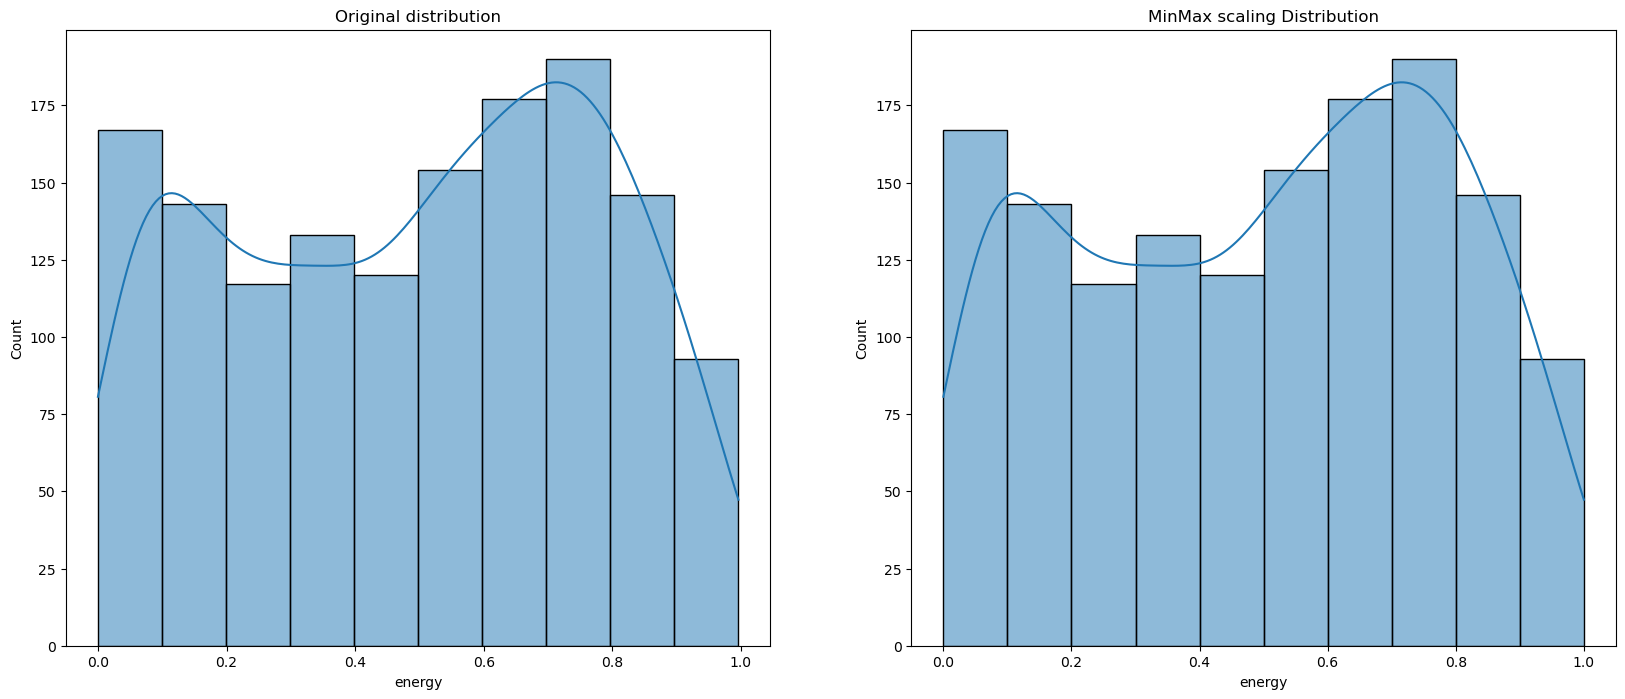

In [39]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=clustersongs_1000.iloc[:,1], bins=10, kde=True, ax=ax1);
sns.histplot(min_max_df.iloc[:,1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Original distribution')
ax2.set_title('MinMax scaling Distribution')

plt.show()

# 4.2 standard Scaling for 1000 songs

In [40]:
standart = StandardScaler(with_mean=True, with_std=True).set_output(transform='pandas')
scaled_1000 = standart.fit_transform(clustersongs_1000)
scaled_1000.to_csv('1000standart.csv')
scaled_1000.sample(5)

danceability    energy  \
title                                                                       
Ritual - Ghost                                         0.598232  1.312044   
Blind Faith - Loadstar Remix - Chase & Status         -0.241501  1.581720   
Hipsippy Blues - Art Blakey & The Jazz Messengers      0.155547 -0.877303   
Bad Boy for Life - Diddy                               0.593669  1.187851   
Hallelujah, I Love Her So - Ray Charles                0.716890  0.187209   

                                                        key  loudness  \
title                                                                   
Ritual - Ghost                                    -1.456298  0.845392   
Blind Faith - Loadstar Remix - Chase & Status     -1.456298  0.898712   
Hipsippy Blues - Art Blakey & The Jazz Messengers -0.043750 -1.173046   
Bad Boy for Life - Diddy                          -1.173788  1.045917   
Hallelujah, I Love Her So - Ray Charles           -0.043750  0.737318   

                                                       mode  speechiness  \
title                                                                      
Ritual - Ghost                                    -1.403236    -0.390809   
Blind Faith - Loadstar Remix - Chase & Status      0.712638    -0.444196   
Hipsippy Blues - Art Blakey & The Jazz Messengers -1.403236    -0.273589   
Bad Boy for Life - Diddy                           0.712638     4.685638   
Hallelujah, I Love Her So - Ray Charles           -1.403236     0.960125   

                                                   acousticness  \
title                                                             
Ritual - Ghost                                        -1.013798   
Blind Faith - Loadstar Remix - Chase & Status         -1.252507   
Hipsippy Blues - Art Blakey & The Jazz Messengers      0.649457   
Bad Boy for Life - Diddy                              -0.776419   
Hallelujah, I Love Her So - Ray Charles                0.860402   

                                                   instrumentalness  liveness  \
title                                                                           
Ritual - Ghost                                            -0.560086 -0.379505   
Blind Faith - Loadstar Remix - Chase & Status             -0.449606 -0.331546   
Hipsippy Blues - Art Blakey & The Jazz Messengers         -0.559995 -0.489128   
Bad Boy for Life - Diddy                                  -0.560163  0.456364   
Hallelujah, I Love Her So - Ray Charles                   -0.560163 -0.132856   

                                                   time_signature   valence  \
title                                                                         
Ritual - Ghost                                           0.247138  0.901695   
Blind Faith - Loadstar Remix - Chase & Status           -1.991093 -1.346771   
Hipsippy Blues - Art Blakey & The Jazz Messengers        0.247138  0.456799   
Bad Boy for Life - Diddy                                 0.247138  0.477653   
Hallelujah, I Love Her So - Ray Charles                  0.247138  0.522838   

                                                      tempo  
title                                                        
Ritual - Ghost                                     0.530395  
Blind Faith - Loadstar Remix - Chase & Status      0.007118  
Hipsippy Blues - Art Blakey & The Jazz Messengers  0.727352  
Bad Boy for Life - Diddy                           0.116609  
Hallelujah, I Love Her So - Ray Charles           -1.330537

# 4.3 Robust Scaling for 1000 songs

In [41]:
robust = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False).set_output(transform='pandas')
robust_1000 = robust.fit_transform(clustersongs_1000)
robust_1000.to_csv('1000robust.csv')
robust_1000.sample(5)

danceability    energy       key  \
title                                                                    
If You Could See Me Now - Chet Baker     -0.157286 -1.017347 -0.333333   
Stolen Moments - Ahmad Jamal Trio        -0.265227 -0.523469  0.333333   
Keep A Knockin - Little Richard          -0.700077  0.809184  0.500000   
Little Darlin' - The Diamonds             0.212799  0.117347  0.166667   
Indeciso - Reik                           0.542791  0.445918 -0.833333   

                                      loudness  mode  speechiness  \
title                                                               
If You Could See Me Now - Chet Baker -1.156378   0.0    -0.186415   
Stolen Moments - Ahmad Jamal Trio    -0.920811  -1.0    -0.293505   
Keep A Knockin - Little Richard       0.019081   0.0     0.943976   
Little Darlin' - The Diamonds        -0.266216   0.0    -0.122955   
Indeciso - Reik                       0.436486   0.0    -0.057511   

                                      acousticness  instrumentalness  \
title                                                                  
If You Could See Me Now - Chet Baker      0.661388          5.620488   
Stolen Moments - Ahmad Jamal Trio         0.599065          5.633008   
Keep A Knockin - Little Richard          -0.499094         -0.000775   
Little Darlin' - The Diamonds             0.148812          1.814541   
Indeciso - Reik                          -0.301440         -0.000795   

                                      liveness  time_signature   valence  \
title                                                                      
If You Could See Me Now - Chet Baker  0.186999             0.0 -0.588817   
Stolen Moments - Ahmad Jamal Trio    -0.179875             0.0 -0.618506   
Keep A Knockin - Little Richard      -0.430988             0.0  0.933201   
Little Darlin' - The Diamonds         1.914515             0.0  0.371103   
Indeciso - Reik                      -0.071238             0.0  0.830282   

                                         tempo  
title                                           
If You Could See Me Now - Chet Baker  0.065129  
Stolen Moments - Ahmad Jamal Trio     0.174344  
Keep A Knockin - Little Richard       1.356412  
Little Darlin' - The Diamonds         0.961193  
Indeciso - Reik                      -0.337852

# 4.4 Quaqntile

In [42]:
quantile = QuantileTransformer(n_quantiles=10, output_distribution='uniform', ignore_implicit_zeros=False, subsample=10000, random_state=None, copy=True).set_output(transform='pandas')
quantile_1000 = quantile.fit_transform(clustersongs_1000)
quantile_1000.to_csv('1000quantile.csv')
quantile_1000.sample(5)

danceability    energy       key  \
title                                                                       
Don't Go Breaking My Heart - Elton John      0.775844  0.885226  0.444444   
Just As Sure - Tori Kelly                    0.518822  0.541667  0.888889   
Stolen Moments - Oliver Nelson               0.517185  0.202038  0.000000   
What Lovers Do (feat. SZA) - Maroon 5        0.890801  0.580330  0.444444   
The Nine - Remastered - Bad Company UK       0.585439  0.617492  0.666667   

                                         loudness  mode  speechiness  \
title                                                                  
Don't Go Breaking My Heart - Elton John  0.514015   1.0     0.155556   
Just As Sure - Tori Kelly                0.547294   1.0     0.751231   
Stolen Moments - Oliver Nelson           0.322017   0.0     0.540003   
What Lovers Do (feat. SZA) - Maroon 5    0.804403   0.0     0.619742   
The Nine - Remastered - Bad Company UK   0.662273   1.0     0.705465   

                                         acousticness  instrumentalness  \
title                                                                     
Don't Go Breaking My Heart - Elton John      0.324166          0.339769   
Just As Sure - Tori Kelly                    0.583560          0.000000   
Stolen Moments - Oliver Nelson               0.835644          0.901536   
What Lovers Do (feat. SZA) - Maroon 5        0.243726          0.352939   
The Nine - Remastered - Bad Company UK       0.138728          0.890696   

                                         liveness  time_signature   valence  \
title                                                                         
Don't Go Breaking My Heart - Elton John  0.090598        0.555556  0.809633   
Just As Sure - Tori Kelly                0.451389        0.555556  0.538650   
Stolen Moments - Oliver Nelson           0.679032        0.555556  0.365469   
What Lovers Do (feat. SZA) - Maroon 5    0.337232        0.555556  0.438248   
The Nine - Remastered - Bad Company UK   0.889059        0.555556  0.160552   

                                            tempo  
title                                              
Don't Go Breaking My Heart - Elton John  0.708674  
Just As Sure - Tori Kelly                0.748673  
Stolen Moments - Oliver Nelson           0.472608  
What Lovers Do (feat. SZA) - Maroon 5    0.495576  
The Nine - Remastered - Bad Company UK   0.917511

# 4.5 Power

In [43]:
power = PowerTransformer(method='yeo-johnson', standardize=True, copy=True).set_output(transform='pandas')
power_1000 = power.fit_transform(clustersongs_1000)
power_1000.to_csv('1000power.csv')
power_1000.sample(5)

danceability    energy  \
title                                                                        
April In Paris - Billie Holiday                        -0.269274 -1.294752   
Shake Ya Tailfeather - Nelly, P. Diddy, Murphy ...      0.569729  1.024367   
A Nightingale Sang In Berkeley Square - Stan Getz      -0.583474 -1.578417   
Rave On - Buddy Holly                                   0.055307  0.764753   
Poor Little Fool - Remastered - Ricky Nelson           -0.368249 -0.567607   

                                                         key  loudness  \
title                                                                    
April In Paris - Billie Holiday                    -1.635960 -0.669138   
Shake Ya Tailfeather - Nelly, P. Diddy, Murphy ... -1.191275  0.850182   
A Nightingale Sang In Berkeley Square - Stan Getz  -1.191275 -1.650683   
Rave On - Buddy Holly                              -1.635960  0.570969   
Poor Little Fool - Remastered - Ricky Nelson       -1.635960 -0.319908   

                                                        mode  speechiness  \
title                                                                       
April In Paris - Billie Holiday                     0.712638    -0.775819   
Shake Ya Tailfeather - Nelly, P. Diddy, Murphy ...  0.712638     1.867238   
A Nightingale Sang In Berkeley Square - Stan Getz   0.712638    -0.663011   
Rave On - Buddy Holly                               0.712638    -0.993006   
Poor Little Fool - Remastered - Ricky Nelson        0.712638    -1.171706   

                                                    acousticness  \
title                                                              
April In Paris - Billie Holiday                         1.178006   
Shake Ya Tailfeather - Nelly, P. Diddy, Murphy ...     -0.641563   
A Nightingale Sang In Berkeley Square - Stan Getz       1.228043   
Rave On - Buddy Holly                                   0.465055   
Poor Little Fool - Remastered - Ricky Nelson            0.554302   

                                                    instrumentalness  \
title                                                                  
April In Paris - Billie Holiday                            -0.640620   
Shake Ya Tailfeather - Nelly, P. Diddy, Murphy ...         -0.641700   
A Nightingale Sang In Berkeley Square - Stan Getz          -0.378196   
Rave On - Buddy Holly                                      -0.641600   
Poor Little Fool - Remastered - Ricky Nelson               -0.641700   

                                                    liveness  time_signature  \
title                                                                          
April In Paris - Billie Holiday                    -0.022453        0.172232   
Shake Ya Tailfeather - Nelly, P. Diddy, Murphy ...  0.479495        0.172232   
A Nightingale Sang In Berkeley Square - Stan Getz   0.187012        0.172232   
Rave On - Buddy Holly                               1.702691        0.172232   
Poor Little Fool - Remastered - Ricky Nelson       -0.050413        0.172232   

                                                     valence     tempo  
title                                                                   
April In Paris - Billie Holiday                    -0.901782 -1.459980  
Shake Ya Tailfeather - Nelly, P. Diddy, Murphy ...  1.468166 -0.867614  
A Nightingale Sang In Berkeley Square - Stan Getz  -0.741454 -0.527047  
Rave On - Buddy Holly                               1.647216  1.327292  
Poor Little Fool - Remastered - Ricky Nelson        1.160875  1.211466